# Install Dependencies

In [163]:
!pip install -U python-telegram-bot

zsh:1: command not found: pip


# Import Dependencies

In [164]:
from telegram import Update, InlineQueryResultArticle, InputTextMessageContent, ParseMode
from telegram.ext import Updater, CallbackContext, InlineQueryHandler
from telegram.ext import CommandHandler, MessageHandler, Filters
import logging

logging.basicConfig(format='%(asctime)s - %(name)s - %(levelname)s - %(message)s',
                     level=logging.INFO)

# Bot

## Config

In [165]:
bot_token = '5535601062:AAGpXCCTWa8OBajV3AeTPrmIOIFjPi_H3p8'
updater = Updater(token=bot_token)
dispatcher = updater.dispatcher

## Create Handlers

In [166]:
def info_handler(update: Update, context: CallbackContext):
    chat_id = update.effective_chat.id
    
    context.bot.send_message(chat_id=chat_id, 
                             text=f'Chat Id: {chat_id}\n\nFrostAura Consolidated')

In [167]:
def text_handler(update: Update, context: CallbackContext):
    context.bot.send_message(chat_id=update.effective_chat.id, text=update.message.text)

In [168]:
# Inline.
def inline_caps(update: Update, context: CallbackContext):
    query = update.inline_query.query
    if not query:
        return
    results = []
    results.append(
        InlineQueryResultArticle(
            id=query.upper(),
            title='Caps',
            input_message_content=InputTextMessageContent(query.upper())
        )
    )
    context.bot.answer_inline_query(update.inline_query.id, results)

## Register Handlers

In [169]:
start_handler = CommandHandler('info', info_handler)
dispatcher.add_handler(start_handler)

In [170]:
text_message_handler = MessageHandler(Filters.text & (~Filters.command), text_handler)
dispatcher.add_handler(text_message_handler)

In [171]:
# Inline
inline_caps_handler = InlineQueryHandler(inline_caps)
dispatcher.add_handler(inline_caps_handler)

## Start the Bot

In [172]:
updater.start_polling()

2022-08-02 14:15:05,736 - apscheduler.scheduler - INFO - Scheduler started


In [173]:
#updater.stop()

In [174]:
updater.bot.send_message(chat_id='1551490751',
                         text="`Dynamic message here...`",)

2022-08-02 14:15:07,271 - telegram.ext.updater - ERROR - Error while getting Updates: Conflict: terminated by other getUpdates request; make sure that only one bot instance is running
2022-08-02 14:15:07,272 - telegram.ext.dispatcher - ERROR - No error handlers are registered, logging exception.
Traceback (most recent call last):
  File "/Users/deanmartin/miniforge3/envs/pytorch/lib/python3.9/site-packages/telegram/ext/updater.py", line 651, in _network_loop_retry
    if not action_cb():
  File "/Users/deanmartin/miniforge3/envs/pytorch/lib/python3.9/site-packages/telegram/ext/updater.py", line 602, in polling_action_cb
    updates = self.bot.get_updates(
  File "/Users/deanmartin/miniforge3/envs/pytorch/lib/python3.9/site-packages/telegram/ext/extbot.py", line 226, in get_updates
    updates = super().get_updates(
  File "/Users/deanmartin/miniforge3/envs/pytorch/lib/python3.9/site-packages/telegram/bot.py", line 133, in decorator
    result = func(*args, **kwargs)
  File "/Users/dean

In [175]:
updater.bot.send_message(chat_id='1551490751', text='<b>Example message</b> where the previous is bold...', 
                  parse_mode=ParseMode.HTML)

In [176]:
!pip install yahoofinancials yahoo_fin

zsh:1: command not found: pip


In [177]:
import yfinance as yf
from yahoofinancials import YahooFinancials
import yahoo_fin.stock_info as si
import io

In [178]:
asset_code = 'MSFT'
asset = yf.Ticker(asset_code)
asset_YF = YahooFinancials(asset_code)

# get historical market data
hist = asset.history(period="max")

2022-08-02 14:15:11,699 - telegram.ext.updater - ERROR - Error while getting Updates: Conflict: terminated by other getUpdates request; make sure that only one bot instance is running
2022-08-02 14:15:11,701 - telegram.ext.dispatcher - ERROR - No error handlers are registered, logging exception.
Traceback (most recent call last):
  File "/Users/deanmartin/miniforge3/envs/pytorch/lib/python3.9/site-packages/telegram/ext/updater.py", line 651, in _network_loop_retry
    if not action_cb():
  File "/Users/deanmartin/miniforge3/envs/pytorch/lib/python3.9/site-packages/telegram/ext/updater.py", line 602, in polling_action_cb
    updates = self.bot.get_updates(
  File "/Users/deanmartin/miniforge3/envs/pytorch/lib/python3.9/site-packages/telegram/ext/extbot.py", line 226, in get_updates
    updates = super().get_updates(
  File "/Users/deanmartin/miniforge3/envs/pytorch/lib/python3.9/site-packages/telegram/bot.py", line 133, in decorator
    result = func(*args, **kwargs)
  File "/Users/dean

In [179]:
def get_figure_buffer(figure):
    buffer = io.BytesIO()
    figure.savefig(buffer, format='png')
    buffer.seek(0)
    
    return buffer

In [180]:
import matplotlib as mpl
from cycler import cycler

2022-08-02 14:15:12,942 - telegram.ext.updater - ERROR - Error while getting Updates: Conflict: terminated by other getUpdates request; make sure that only one bot instance is running
2022-08-02 14:15:12,944 - telegram.ext.dispatcher - ERROR - No error handlers are registered, logging exception.
Traceback (most recent call last):
  File "/Users/deanmartin/miniforge3/envs/pytorch/lib/python3.9/site-packages/telegram/ext/updater.py", line 651, in _network_loop_retry
    if not action_cb():
  File "/Users/deanmartin/miniforge3/envs/pytorch/lib/python3.9/site-packages/telegram/ext/updater.py", line 602, in polling_action_cb
    updates = self.bot.get_updates(
  File "/Users/deanmartin/miniforge3/envs/pytorch/lib/python3.9/site-packages/telegram/ext/extbot.py", line 226, in get_updates
    updates = super().get_updates(
  File "/Users/deanmartin/miniforge3/envs/pytorch/lib/python3.9/site-packages/telegram/bot.py", line 133, in decorator
    result = func(*args, **kwargs)
  File "/Users/dean

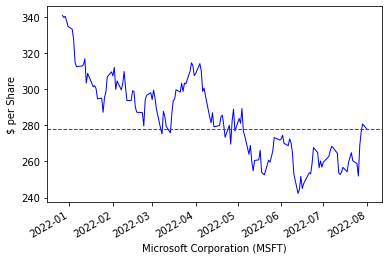

In [181]:
mpl.rcParams['lines.linewidth'] = 1
mpl.rcParams['lines.linestyle'] = '-'
mpl.rcParams['axes.prop_cycle'] = cycler(color=['b', 'g', 'r', 'y'])

last_x_days = -150
data_to_visualize = hist[last_x_days:]

plot_to_visualize = data_to_visualize['Close'].plot()
plot_to_visualize.set_ylabel('$ per Share')
plot_to_visualize.set_xlabel(f'{asset.info["shortName"]} ({asset_code})')
plot_to_visualize.axhline(y = hist[-1:].Close.values[0],
                          color = 'r' if hist[-1:].Close.values[0] < hist[-2:].Close.values[0] else 'g',
                          linestyle = '--')
figure_to_visualize = plot_to_visualize.get_figure()

In [182]:
updater.bot.send_photo(chat_id='1551490751', photo=get_figure_buffer(figure_to_visualize))